# Assignment 14 - Decision Trees (Fraud Check)

**Problem Statement:**
    
Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good".

#### Data Description :

Undergrad : person is under graduated or not.
    
Marital.Status : marital status of a person.
    
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government.
    
Work Experience : Work experience of an individual person.
    
Urban : Whether that person belongs to urban area or not.


### Importing Required Libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

### Importing Dataset:

In [2]:
data = pd.read_csv("C:/Users/DELL/Desktop/ExcelR DS Assignments/Assignment 14 - Decision Trees/Fraud_check.csv")
data.head()            

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### Plotting the data:

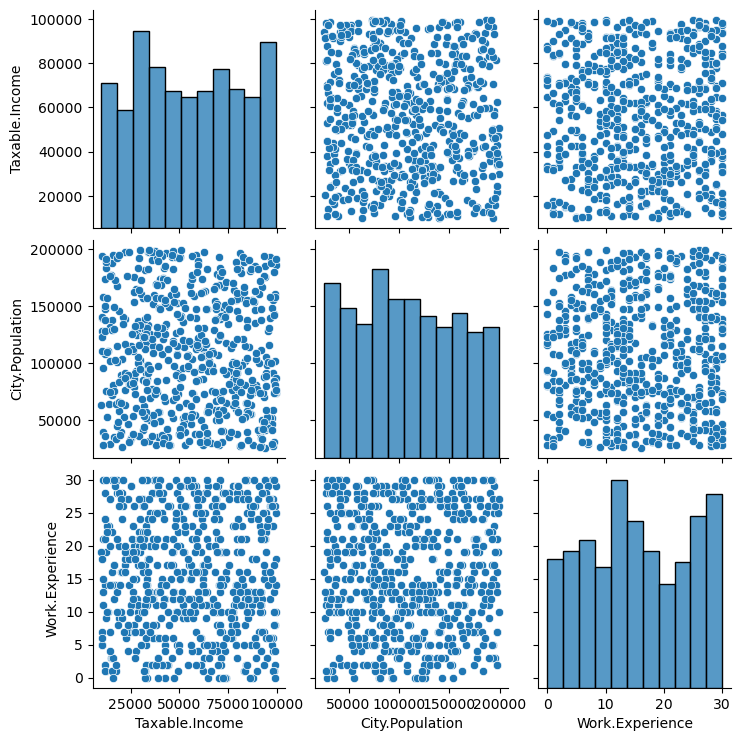

In [3]:
sns.pairplot(data)
plt.show()

### Performing EDA on Dataset:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data[data.duplicated()].sum()

Undergrad          0.0
Marital.Status     0.0
Taxable.Income     0.0
City.Population    0.0
Work.Experience    0.0
Urban              0.0
dtype: float64

In [7]:
data[data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [8]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
data.shape

(600, 6)

In [10]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [11]:
df = data.copy()

**Creating x and y datasets:**

In [12]:
x = df.drop(['Taxable.Income'],axis=1)

In [13]:
x.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [14]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO


**Transforming string data types to numeric:**

In [15]:
label_encoder = preprocessing.LabelEncoder()
x['Undergrad'] = label_encoder.fit_transform(x['Undergrad'])

In [16]:
x['Marital.Status'] = label_encoder.fit_transform(x['Marital.Status'])
x['Urban'] = label_encoder.fit_transform(x['Urban'])

In [17]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [18]:
y = data[['Taxable.Income']]

In [19]:
y.head()

,Taxable.Income
0,68833
1,33700
2,36925
3,50190
4,81002


In [20]:
y['tax']=['risky' if x<=30000 else 'good' for x in y['Taxable.Income']]

In [21]:
y= y.drop(['Taxable.Income'],axis=1)

In [22]:
y.head(30)

,tax
0,good
1,good
2,good
3,good
4,good
5,good
6,good
7,good
8,good
9,good


In [23]:
#splitting data into training and testing data set:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=40)

In [24]:
#building decision tree model:

model = DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

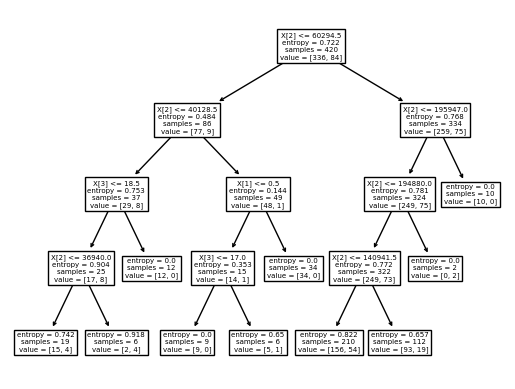

In [25]:
tree.plot_tree(model);

In [26]:
x.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [27]:
y.columns

Index(['tax'], dtype='object')

In [28]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['good','risky']

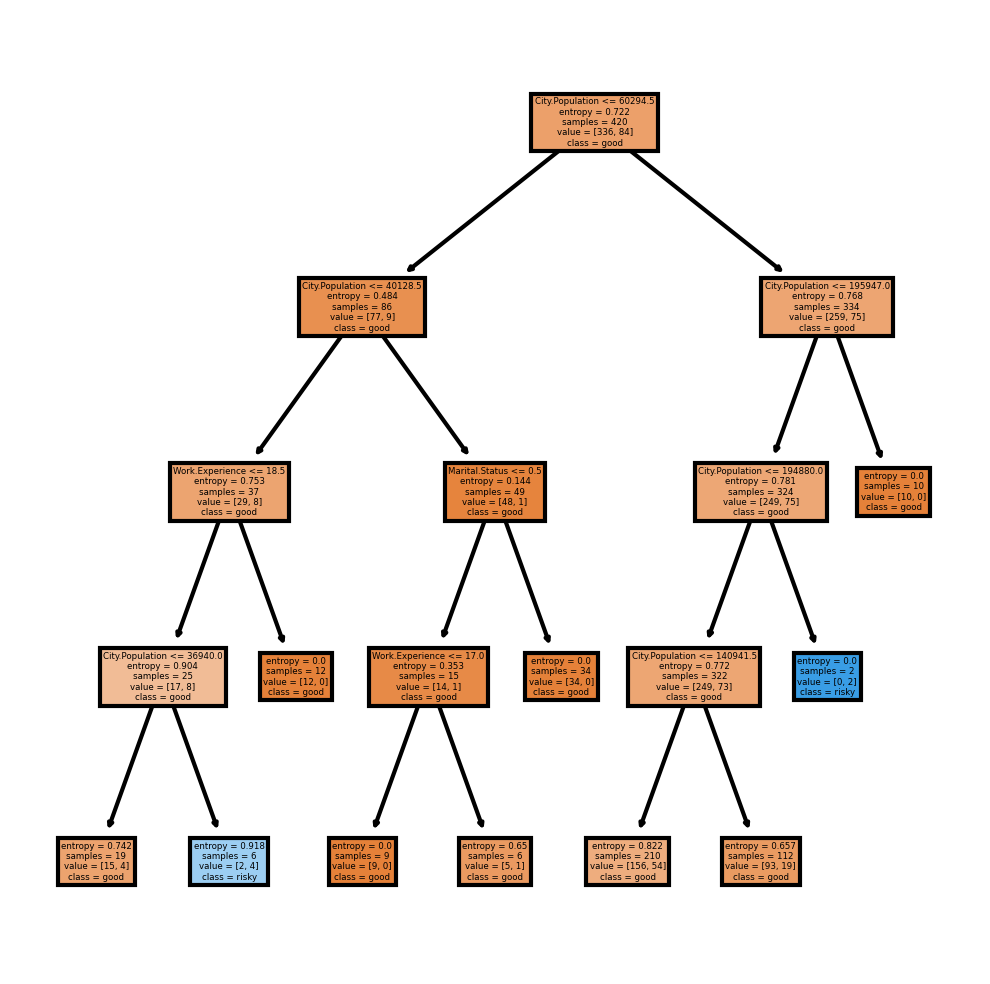

In [29]:
fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [30]:
#predicting on test data:

pred = model.predict(x_test)
pred

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
    

In [31]:
pd.Series(pred).value_counts()

good     177
risky      3
dtype: int64

In [32]:
print(model.score(x_test,y_test)*100,'%')

76.11111111111111 %
